In [1]:
import torch
import numpy as np

# PyTorch Tensors

- Tensors in PyTorch have equivalent functions as its Numpy counterpart like: `ones()`, `zeros()`, `rand()`, `randn()`, and many more...

In [2]:
import torch

# creating a scalar, and three tensors (vector, matrix, tensor)
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[-0.4561, -0.6138, -1.1237,  0.6508],
         [ 0.2088,  1.0292,  1.1256,  0.7728],
         [ 0.9694, -0.2683, -0.1075, -2.3003]],

        [[ 0.5485, -0.8970,  1.8781,  0.1102],
         [-0.4681, -0.3430, -0.3773,  1.0900],
         [ 1.9485,  1.4436, -1.0792,  1.0004]]])


- We can get it's dimension using it's `size()` method or `size` attribute.

In [3]:
import torch

# creating a tensor and printing it's shape
tensor = torch.randn((2, 3, 4), dtype=torch.float)
print(tensor.size(), tensor.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


- All tensors have it's dimension except scalars

In [4]:
import torch

# creating a scalar and printing it's shape
scalar = torch.tensor(3.14159)
print(scalar.size(), scalar.shape)

torch.Size([]) torch.Size([])


## Reshaping Tensors

- You can also reshape your tensors using `view()` (preferred) method or `reshape()` methods

**Beware**: 
- The `view()` method only returns a tensor with desired shape that shares the underlying data with the original tensor. It doesn't create a new, independent one. \
- The `reshape()` may or maynot create a copy! That's why `view()` is preferred.

In [5]:
import torch

matrix = torch.ones((2, 3), dtype=torch.float)
# We get a tensor with a different shape but it still is the SAME tensor
same_matrix = matrix.view(1, 6)
# If we change one of its elements...
same_matrix[0, 1] = 2.
# It changes both variables: matrix and same_matrix
print(matrix)
print(same_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 1., 1., 1., 1.]])


- If you want to copy or duplicate all the data for real. Then you can use either it's `new_tensor()` or `clone()` mothods.

In [6]:
import torch

matrix = torch.ones((2, 3), dtype=torch.float)
# We can use "new_tensor" method to REALLY copy it  into a new one
different_matrix = matrix.new_tensor(matrix.view(1, 6))
# Now, if we change one of its elements...
different_matrix[0, 1] = 3.
# The original tensor (matrix) is left untouched!
# But we get a "warning" from PyTorch telling us 
# to use "clone()" instead!
print(matrix)
print(different_matrix)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 3., 1., 1., 1., 1.]])


/var/folders/09/3m09y2cx0cq_1x4gp8q0ng2m0000gn/T/ipykernel_53794/439821682.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  different_matrix = matrix.new_tensor(matrix.view(1, 6))


In above code you might be getting UserWarning due to `new_tensor()` method. It seems PyTorch prefers that we use `clone()` instead of `new_tensor()`. Both way accompolish the same result, but code below is deemed cleaner and more readable.

In [7]:
import torch

matrix = torch.ones((2, 3), dtype=torch.float)
# Lets follow PyTorch's suggestion and use "clone" method
another_matrix = matrix.view(1, 6).clone().detach()
# Again, if we change one of its elements...
another_matrix[0, 1] = 4.
# The original tensor (matrix) is left untouched!
print(matrix)
print(another_matrix)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 4., 1., 1., 1., 1.]])


- Q: What about the `detach()` method? What does it do?
- A: It removes the tensor from computational graph.

# Loading Data, Devices and CUDA

## Conversion between Numpy and PyTorch 

- The `as_tensor()` method preserves the type of the array.

In [9]:
dummy_array = np.array([2, 1, 3, 4, 5])

In [11]:
# Using as_tensor function to convert Numpy array to PyTorch tensor
dummy_array_tensor = torch.as_tensor(dummy_array)
print(dummy_array.dtype, dummy_array_tensor.dtype)

int64 torch.int64


You can also cast it to a different type like lower presicion (32-bit) which will take even lesser memory using `float()` method.

In [12]:
# Using float function to change data types 
dummy_array_tensor = torch.as_tensor(dummy_array)
float_tensor = dummy_array_tensor.float() # (going from float64 to float32) 
print(float_tensor.dtype)

torch.float32


- **Important**: Both `as_tensor()` and `from_numpy()` return a tensor that shares the underlying data with the original Numpy array. Similar to what happened when we used `view()` in the previous lesson, if you modify the original Numpy array, you are modifying the corresponding PyTorch tensor too and vice-versa.

- Q: What do we need `as_tensor()` for? Why can’t we just use `torch.tensor()`?
- A: Well, you could. Just keep in mind that `torch.tensor()` always makes a copy of the data instead of sharing the underlying data with the Numpy array.

You can also perform the opposite operation; namely, transforming a PyTorch tensor back to a Numpy array using the `numpy()` method:

In [13]:
import numpy as np
import torch

dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)
# Modifies the numpy array
dummy_array[1] = 0
# Using numpy function to convert PyTorch tensor to Numpy array
print(dummy_tensor.numpy())

[1 0 3]


## GPU Tensors

- You can use `cuda.is_available()` to find out if you have a GPU at your disposal and set your device accordingly. So, it is good practice to figure this out at the top of your code.

In [14]:
# checking if your device has GPU or not
device = 'cuda' if torch.cuda.is_available() else 'cpu'

- If you are using someone else’s computer and you do not know how many GPUs it has or which model they are, you can figure it out using cuda.`device_count()` and `cuda.get_device_name()`

In [15]:
import torch

n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

- Turning tensor into GPU tensor:
- There is only one thing left to do; turn our tensor into a GPU tensor. That is what `to()` is good for. It sends a tensor to the specified device.

In [16]:
# converting the training numpy array to a tensor first and then to a GPU tensor
gpu_tensor = torch.as_tensor(dummy_array).to(device)
print(gpu_tensor[0])

tensor(1)


- For GPU, expected output would be: `tensor(1, device='cuda:0', dtype=torch.float64)`

## Creating Parameters

What distinguishes a tensor used for training data from a tensor used as a trainable parameter/weight?

The latter requires the computation of its gradients, so we can update their values (the parameters’ values, that is). That is what the `requires_grad=True` argument is good for. It tells PyTorch to compute gradients for us.

### Creating Parameters only for CPU

In [17]:
import torch

# FIRST
# Initializes parameters "b" and "w" randomly, ALMOST as we 
# did in Numpy since we want to apply gradient descent on 
# these parameters we need to set REQUIRES_GRAD = TRUE
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


### Creating trainable parameters for GPUs

In [18]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# SECOND
# But what if we want to run it on a GPU? We could just 
# send them to device, right?
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b, w)
# Sorry, but NO! The to(device) "shadows" the gradient...

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


- GPU users will get an output similat to the following:
    - `tensor([0.3367], device:'cuda:0', grad_fn=<CopyBackwards>)`
    - `tensor([0.1288], device:'cuda:0', grad_fb=<CopyBackwards>)`

We succeeded in sending them to another device, but we lost the gradients somehow since there is no more `requires_grad=True` (don’t bother with the weird grad_fn). Clearly, we need to do better.

### Third Attempt

- In this attempt, we first send the tensor to GPU and then set it's `required_gradient=True`
- In PyTorch, every method that ends with an underscore ( _ ) like the requires_grad_() method above, makes changes in-place; meaning, they will modify the underlying variable.

In [19]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# THIRD
# We can either create regular tensors and send them to 
# the device (as we did with our data)
torch.manual_seed(42)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
b.requires_grad_()
w.requires_grad_()
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


- GPU users will get an output similat to the following:
    - `tensor([0.3367], device:'cuda:0', requires_grad=True)`
    - `tensor([0.1288], device:'cuda:0', required_grad=True)`

### Final Attempt

- Yes, we can do better. We can assign tensors to a device at the moment of their creation.

In [20]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# FINAL
# We can specify the device at the moment of creation
# RECOMMENDED!

# Step 0 - initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


- GPU users will get an output similat to the following:
    - `tensor([0.3367], device:'cuda:0', requires_grad=True)`
    - `tensor([0.1288], device:'cuda:0', required_grad=True)`

**Always assign tensors to a device at the moment of its creation to avoid unexpected behaviors!**

# Autograd

Autograd in PyTorch's automatic defferential package. Thanks to it, we do not need to worry about partial derivatives, chain rules, or anything like it.

### The `backward` method

- While doing forward propogation in a model, we get final loss value (using error expression). We have set `requires_grad=True` to both `b` and `w`, so they are obviously included in the list of trainable parameters. Then we use `yhat` to compute the `error`, which is also added to the list. Hence, the following will be handled by the backward method:
    - `b`
    - `w`
    - `yhat`
    - `error`

In [23]:
x_train_tensor = torch.tensor([2, 1, 3, 5])
y_train_tensor = torch.tensor([2, 4, 5, 1])

In [31]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - computes the loss
# We are using ALL data points, so this is BATCH gradient 
# descent. How wrong is our model? That's the error! 
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

# Step 3 - computes gradients for both "b" and "w" parameters
# No more manual computation of gradients! 
# b_grad = 2 * error.mean()
# w_grad = 2 * (x_tensor * error).mean()   
loss.backward()                           # 1)

We can see that `error`, `yhat`, `b` and `w` have `requires_grad=True` where as `x_train_tensor` and `y_train_tensor` doesn't has `requires_grad=True`

In [32]:
# using requires_grad to check if the following tensor require gradients or not
print(error.requires_grad, yhat.requires_grad, \
      b.requires_grad, w.requires_grad)
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

True True True True
False False


In [33]:
print(b.grad, w.grad)

tensor([-13.8545]) tensor([-28.9093])


If we repeat the `backward` method multiple times, then `grad` value of trainable paramers starts accumulate. This is not what we want while training a model. So to avoid that, we need to set the grad back to zero using `zero_()` method.

In [34]:
print(b.grad.zero_(), w.grad.zero_())

tensor([0.]) tensor([0.])


In below code there are 3 attempts to create a traning loop with `n_epochs` number of epochs. In below case if we get grad of a trainable parameters using `grad` attribute, then after a call it assigns `None` to trainable parameter. So this throws `UserWarning` in first case. In second case PyTorch is unable to do dymanic computation. So the best approach is to use with context of `torch.no_grad()`

In [73]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

# Step 0 - initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines number of epochs
n_epochs = 40

for epoch in range(n_epochs):
    # Step 1 - computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - computes the loss
    # We are using ALL data points, so this is BATCH gradient 
    # descent. How wrong is our model? That's the error! 
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - computes gradients for both "b" and "w"
    # parameters. No more manual computation of gradients! 
    # b_grad = 2 * error.mean()
    # w_grad = 2 * (x_tensor * error).mean()   
    # We just tell PyTorch to work its way BACKWARDS
    # from the specified loss!
    loss.backward()
    
    # Step 4 - updates parameters using gradients and
    # the learning rate. But not so fast...
    # FIRST ATTEMPT - just using the same code as before
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # b = b - lr * b.grad                          # 1)
    # w = w - lr * w.grad                          # 1)
    # print(b)                                     # 1)

    # SECOND ATTEMPT - using in-place Python assingment
    # RuntimeError: a leaf Variable that requires grad
    # has been used in an in-place operation.
    # b -= lr * b.grad                             # 2)
    # w -= lr * w.grad                             # 2)
    
    # THIRD ATTEMPT - NO_GRAD for the win!
    # We need to use NO_GRAD to keep the update out of 
    # the gradient computation. Why is that? It boils 
    # down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():                          # 3)
        b -= lr * b.grad                           # 3)
        w -= lr * w.grad                           # 3)
    
    # PyTorch is "clingy" to its computed gradients, we
    # need to tell it to let it go...
    b.grad.zero_()                                 # 4)
    w.grad.zero_()                                 # 4)
    
    
print(b, w)

tensor([-4.7035], requires_grad=True) tensor([-29.9299], requires_grad=True)


# Dynamic Computation Graphs

In [74]:
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

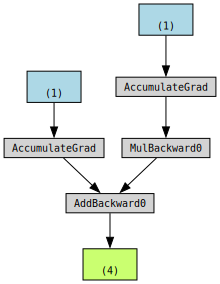

In [75]:
# Step 0 - initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Step 1 - computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - computes the loss
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()

# We can try plotting the graph for any python variable:
# yhat, error, loss...
make_dot(yhat)

- **Blue boxes ((1)s)**: These boxes correspond to the tensors we use as parameters; the ones we are asking PyTorch to compute gradients for.
- **Gray boxes (MulBackward0 and AddBackward0)**: A python operation that involves a gradient-computing tensor or its dependencies.
- **Green box (4)**: The tensor is used as the starting point for the computation of gradients, assuming the `backward()` method is called from the variable used to visualize the graph. They are computed from the bottom-up in a graph.

# Optimizer

When number of trainable parameters increases, then it becomes difficult to keep track of each parameters. To rescue this, PyTorch provides it's own modules of `optimizer` such as `SGD`, `RMSprop` or `Adam`

- There are so many optimizers; SGD is the most basic of them, and Adam is one of the most popular.

- Different optimizers use different mechanics for updating the parameters, but they all achieve the same goal through (literally) different paths.

- Remember: The choice of mini-batch size influenced the path of gradient descent, and so does the choice of an optimizer.

In [76]:
# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## The `step` and `zero_grad` methods

An optimizer takes the parameters we want to update, the learning rate we want to use (and possibly many other hyper-parameters as well), and performs the updates through its `step()` method.

Besides, we also do not need to zero the gradients one-by-one anymore. We just invoke the optimizer’s `zero_grad()` method, and that is it!

In the code below, we create a **Stochastic Gradient Descent** (SGD) optimizer to update our parameters `b` and `w`.

**Do not be fooled by the optimizer’s name. If we use all training data at once for the update as we are actually doing in this code, the optimizer is performing a batch gradient descent despite its name.**

In [78]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

# Step 0 - initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)               # 1)

# Defines number of epochs
n_epochs = 40

for epoch in range(n_epochs):
    # Step 1 - computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error! 
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - updates parameters using gradients and 
    # the learning rate. No more manual update!
    # with torch.no_grad():
    #     b -= lr * b.grad
    #     w -= lr * w.grad
    optimizer.step()                               # 2)
    
    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()
    optimizer.zero_grad()                          # 3)
    
print(b, w)

tensor([-4.7035], requires_grad=True) tensor([-29.9299], requires_grad=True)


# Loss

For computing loss of a model, PyTorch provides a variety of loss functions to choose from depending on the task at hand. For example, for regression task, we define a Mean Squared Error (MSE) as our loss. `nn.MSELoss`

In [79]:
import torch.nn as nn

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')
print(loss_fn)

MSELoss()


Notice that nn.MSELoss is not the loss function itself. We do not pass predictions and labels to it! Instead, as you can see, it returns another function, which we called loss_fn. That is the actual loss function. So, we can pass a prediction and a label to it, and get the corresponding loss value:

In [80]:
import torch
import torch.nn as nn

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])
print(loss_fn(predictions, labels))

tensor(1.1700)


In [85]:
x_train_tensor = torch.tensor([1, 2, 3, 5], dtype=torch.float)
y_train_tensor = torch.tensor([2, 4, 4, 1], dtype=torch.float)

In [86]:
# Sets learning rate - this is "eta" ~ the "n" like
# Greek letter
lr = 0.1

# Step 0 - initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')             # 1)

# Defines number of epochs
n_epochs = 40

for epoch in range(n_epochs):
    # Step 1 - computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - computes the loss
    # No more manual loss!
    # error = (yhat - y_train_tensor)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)           # 2)

    # Step 3 - computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - updates parameters using gradients and 
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
print(b, w)

tensor([-4.8576], requires_grad=True) tensor([-28.0349], requires_grad=True)


## Converting loss tensor to Numpy array

What if we want to have it as a Numpy array? We could just use `numpy()` again right? (And use `cpu()` as well since our loss is in the `cuda` device)

In [87]:
loss.cpu().numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

What heppened here? Unlike our data tensors, the loss tensor is actually computing gradients. To use `numpy()`, we need to `detach()` the tensor from the computation graph first:

In [88]:
# converting to numpy using detach since gradient is being computed
print(loss.detach().cpu().numpy())

7202.655


This seems like a lot of work, there must be an easier way! We can use item() for tensors with a single element or tolist() otherwise (it still returns a scalar if there is only one element though).

In [89]:
# using item and tolist methods for converting loss tensor to numpy
print(loss.item(), loss.tolist())

7202.65478515625 7202.65478515625


# Model

In PyTorch, a model is represented by a regular Python class that inherits from the `Module` class. The most fundamental methods a model class needs to implement are:
- `__init__(self)`: It defines the parts that make up the model; in our case, two parameters of `b` and `w`.
    - You are not limited to defining parameters though. Models can contain other models as their attributes as well, so you can easily nest them.
    - Besides, do not forget to include `super().__init__()` to execute the `__init__()` method of the **parent class** (`nn.Module`) before your own.


- `forward(self, x)`: It performs the actual computation; that is, it outputs a prediction, given the input `x`
    - It may seem weird, but whenever you are using your model to make predictions, you should not call the `forward(x)` method!
    - You should call the whole model instead (as `model(x)`) to perform a forward pass and output predictions.
    - The reason for this is because the call to the whole model involves extra steps, namely, handling forward and backward hooks. If you do not use hooks (and we do not use any right now), both calls are equivalent.

Hooks are a very useful mechanism that allows retrieving intermediate values in deeper models.

In [90]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "b" and "w" real parameters of the model, 
        # we need to wrap them with nn.Parameter
        self.b = nn.Parameter(torch.randn(1, 
                                          requires_grad=True, 
                                          dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, 
                                          requires_grad=True,
                                          dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

## The `Parameter` and `parameters` methods

In the `__init__` method, we define our two paramters of `b` and `w`, using the `Parameter()` class, to tell PyTorch that these tensors, which are attributes of the `ManualLinearRegression` class, should be considered parameters of the model the class represents.

Why should we care about that? By doing so, we can use our model's `parameters()` method to retrieve an iterator over all model's parameters, including parameters of **nested models**. Then we can use it to feed our optimizer (instead of building a list of parameters ourselves).

In [91]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
dummy = ManualLinearRegression()
print(list(dummy.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


## The `state_dict` method

The `state_dict()` of a given model is simply a Python dictionary that maps each attributes/parameter to its corresponding tensor. But only learnable parameters are included, as its purpose is to keep track of parameters that are going to be updated by the optimizer.

By the way, the **optimizer** itself has a `state_dict()` too, which contains its internal state as well as other hyper-parameters.

In [93]:
# Defines a SGD optimizer
optimizer = optim.SGD([b, w], lr=lr)
print(optimizer.state_dict())

{'state': {}, 'param_groups': [{'lr': 0.1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}


## Device

If we were to send our dummy model to a device, it would look like this:

In [94]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
# and sends it to the device
dummy = ManualLinearRegression().to(device)

## Forward pass

- The **forward pass** is the moment when the model **makes predictions**

In [96]:
# Sets learning rate - this is "eta" ~ the "n" like 
# Greek letter
lr = 0.1

# Step 0 - initializes parameters "b" and "w" randomly
torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)        # 1)

# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 100

for epoch in range(n_epochs):
    model.train() # What is this?                # 2)

    # Step 1 - computes model's predicted output - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor)                   # 3)
    
    # Step 2 - computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict([('b', tensor([-3873.1943])), ('w', tensor([-13453.2734]))])


## The `train` method

In PyTorch, models have a `train()` method, which does NOT perform a training step. Its only purpose is to set the model to training mode.

Why is this important? Some models may use mechanism like `Dropout` for instance, which have distinct behavoprs during training and evaluation phases.

It is good practice to call `model.train()` in the training loop. It is also possible to set a model to evaluation mode.

# Model Types

## Nested Model

- Creating a model with defining a linear model inside.

In [97]:
class MyLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear model 
        # with a single input and a single output
        self.linear = nn.Linear(1, 1)
                
    def forward(self, x):
        # Now it only takes a call
        self.linear(x)

Now, if we call the `parameters()` method of this model, PyTorch will figure the parameters of this attributes recursively.

In [98]:
torch.manual_seed(42)
# creating dummy instance of our MyLinearRegression model
dummy = MyLinearRegression().to(device)
print(list(dummy.parameters()))

[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]


If you prefer, you can also use state_dict() to get the parameter values together with their names

In [109]:
# creating dummy instance of our MyLinearRegression model
dummy = MyLinearRegression().to(device)
print(dummy.state_dict())

OrderedDict([('linear.weight', tensor([[-0.2343]])), ('linear.bias', tensor([0.9186]))])


## Sequential Models

Our model was simple enough. You may be thinking: “why even bother to build a class for it?” Well, you have a point.

For straightforward models that use a series of built-in PyTorch models (like `Linear`) where the output of one is sequentially fed as an input to the next, we can use a `Sequential` model.

In our case, we would build a `Sequential` model with a single argument; that is, the `Linear` model we used to train our linear regression. The model would look like this:

In [110]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)
print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]])), ('0.bias', tensor([0.8300]))])
